# This notebook forecasts Apple price using basic ARIMA model

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timedelta
from seaborn import set_style
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
## Import SARIMAX from tsa.api
from statsmodels.tsa.arima.model import ARIMA

In [5]:
set_style("whitegrid")

## Load

In [6]:
pwd

'/Users/ziyuan/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/Machine_Learning/Erdos_Bootcamp/Project/modeling/modeling'

In [7]:
apple_all_factor=pd.read_csv('../../Dataset/merge_data_all_factor.csv')
apple_all_factor["Date"] = pd.to_datetime(apple_all_factor["Date"])

In [8]:
apple_all_factor.head(3)

,Date,Close,Volume,Dow_Jones,SP500,Gross_Profit,ROE,PE_ratio,PS_ratio,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,2012-11-12,19.386786,515802000,12815.08,1380.03,14401,0.4,12.93,3.45,1.61,0.18,0.16,16420.386,2.280688,231.249
1,2012-11-13,19.389286,532949200,12756.18,1374.53,14401,0.4,12.93,3.45,1.59,0.18,0.16,16420.386,2.280688,231.249
2,2012-11-14,19.174286,477170400,12570.95,1355.49,14401,0.4,12.93,3.45,1.59,0.18,0.16,16420.386,2.280688,231.249


## Train Test Split

In [9]:
ratio=0.75
num_of_train=int(ratio*len(apple_all_factor))

In [10]:
[num_of_train, len(apple_all_factor)]

[1896, 2528]

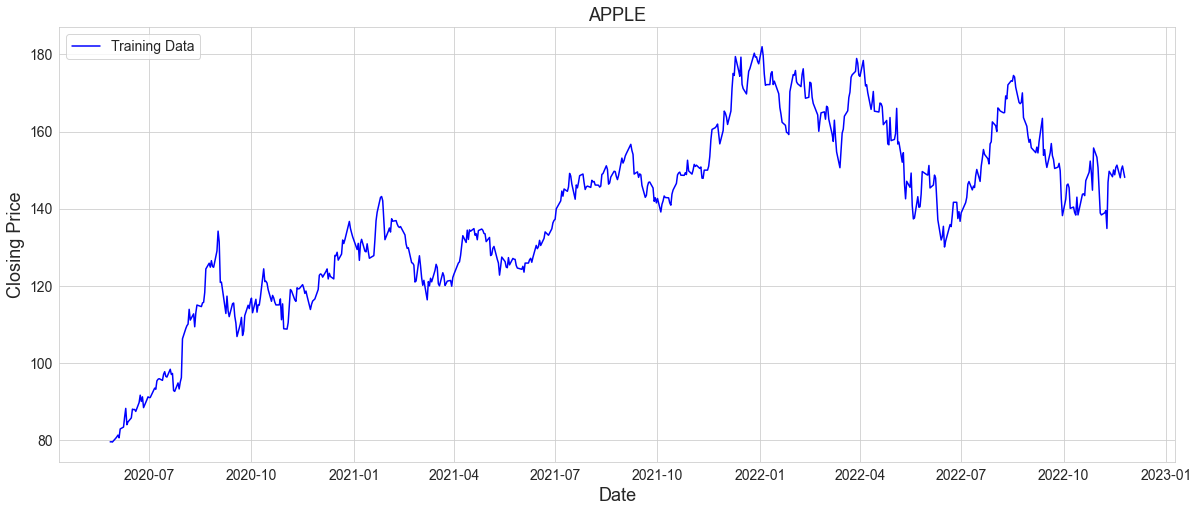

In [11]:
plt.figure(figsize=(20,8))


plt.plot(apple_all_factor.Date[num_of_train:], 
         apple_all_factor.Close[num_of_train:],
         'b',
         label="Training Data")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title('APPLE', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

In [12]:
apple_train = apple_all_factor.iloc[:num_of_train].copy()
apple_test = apple_all_factor.iloc[num_of_train:].copy()

In [13]:
[apple_train.shape,apple_test.shape, len(apple_all_factor)]

[(1896, 15), (632, 15), 2528]

In [14]:
apple_train

,Date,Close,Volume,Dow_Jones,SP500,Gross_Profit,ROE,PE_ratio,PS_ratio,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,2012-11-12,19.386786,515802000,12815.08,1380.03,14401,0.40,12.93,3.45,1.61,0.18,0.16,16420.386,2.280688,231.249
1,2012-11-13,19.389286,532949200,12756.18,1374.53,14401,0.40,12.93,3.45,1.59,0.18,0.16,16420.386,2.280688,231.249
2,2012-11-14,19.174286,477170400,12570.95,1355.49,14401,0.40,12.93,3.45,1.59,0.18,0.16,16420.386,2.280688,231.249
3,2012-11-15,18.772142,789910800,12542.38,1353.33,14401,0.40,12.93,3.45,1.58,0.17,0.16,16420.386,2.280688,231.249
4,2012-11-16,18.845715,1266893600,12588.31,1359.88,14401,0.40,12.93,3.45,1.58,0.16,0.16,16420.386,2.280688,231.249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,2020-05-19,78.285004,101729600,24206.86,2922.94,22370,0.64,19.59,4.21,0.70,0.16,0.05,19636.731,-3.404590,255.944
1892,2020-05-20,79.807503,111504800,24575.90,2971.61,22370,0.64,19.59,4.21,0.68,0.16,0.05,19636.731,-3.404590,255.944
1893,2020-05-21,79.212502,102688800,24474.12,2948.51,22370,0.64,19.59,4.21,0.68,0.16,0.05,19636.731,-3.404590,255.944
1894,2020-05-22,79.722504,81803200,24465.16,2955.45,22370,0.64,19.59,4.21,0.66,0.17,0.05,19636.731,-3.404590,255.944


In [15]:
apple_test

,Date,Close,Volume,Dow_Jones,SP500,Gross_Profit,ROE,PE_ratio,PS_ratio,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
1896,2020-05-27,79.527496,112945200,25548.27,3036.13,22370,0.64,19.59,4.21,0.68,0.18,0.05,19636.731,-3.40459,255.944
1897,2020-05-28,79.562500,133560800,25400.64,3029.73,22370,0.64,19.59,4.21,0.70,0.17,0.05,19636.731,-3.40459,255.944
1898,2020-05-29,79.485001,153532400,25383.11,3044.31,22370,0.64,19.59,4.21,0.65,0.17,0.05,19636.731,-3.40459,255.944
1899,2020-06-01,80.462502,80791200,25475.02,3055.73,22370,0.64,19.59,4.21,0.66,0.17,0.05,19636.731,-3.40459,257.217
1900,2020-06-02,80.834999,87642800,25742.65,3080.82,22370,0.64,19.59,4.21,0.68,0.17,0.06,19636.731,-3.40459,257.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2022-11-18,151.289993,74794600,33745.69,3992.93,38095,1.61,22.58,5.74,3.82,4.74,3.83,25663.289,1.80000,298.062
2524,2022-11-21,148.009995,58724100,33700.28,3992.93,38095,1.61,22.58,5.74,3.83,4.75,3.83,25663.289,1.80000,298.062
2525,2022-11-22,150.179993,51804100,34098.10,3992.93,38095,1.61,22.58,5.74,3.76,4.79,3.83,25663.289,1.80000,298.062
2526,2022-11-23,151.070007,58301400,34194.06,3992.93,38095,1.61,22.58,5.74,3.71,4.75,3.83,25663.289,1.80000,298.062


## ARIMA Model1

In [16]:
# ARIMA Model(order=(p,d,q))
model_arima = ARIMA(apple_train.Close, order=(5,1,3)).fit()

/Users/ziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1896
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -2101.522
Date:                Fri, 09 Dec 2022   AIC                           4221.044
Time:                        01:12:11   BIC                           4270.966
Sample:                             0   HQIC                          4239.424
                               - 1896                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7981      0.035    -22.579      0.000      -0.867      -0.729
ar.L2          0.6472      0.036     17.851      0.000       0.576       0.718
ar.L3          0.7975      0.033     24.369      0.0

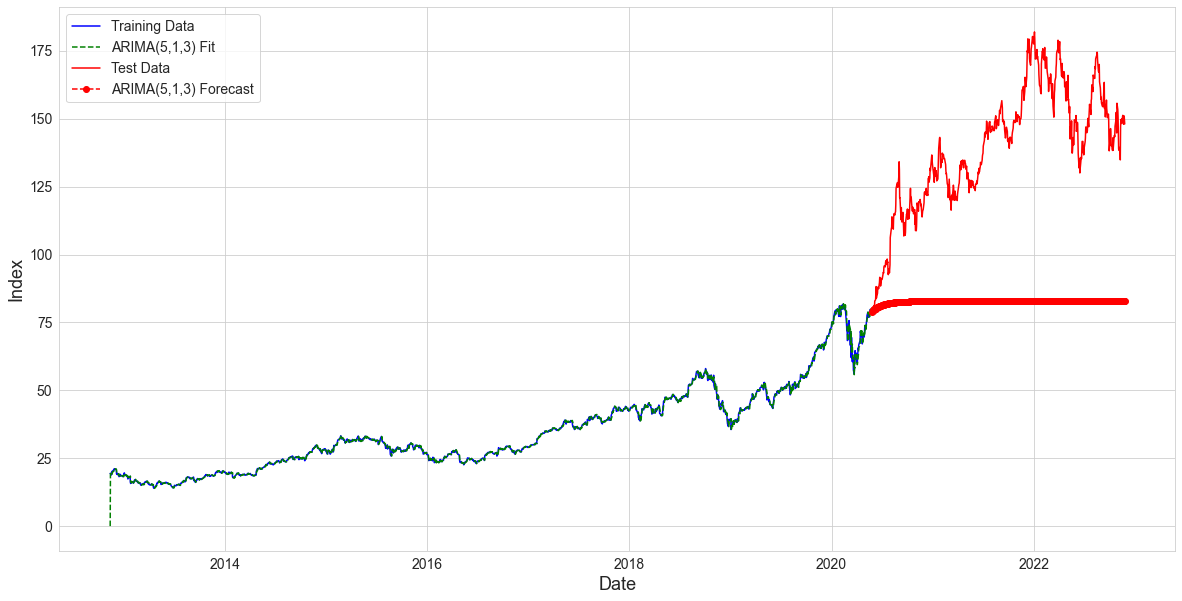

In [18]:
plt.figure(figsize=(20,10))


plt.plot(apple_train.Date[:], 
         apple_train.Close[:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(apple_train.Date[:],
         model_arima.fittedvalues[:],
         'g--',
         label="ARIMA(5,1,3) Fit")

plt.plot(apple_test.Date[:], 
         apple_test.Close[:],
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(apple_test.Date[:], 
         model_arima.forecast(len(apple_test)),
         'r--o',
         label="ARIMA(5,1,3) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Index", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

In [20]:
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true))

In [21]:
mse_arima1 = mean_squared_error(apple_test[['Close']].values, 
                                model_arima.forecast(len(apple_test)))
mse_arima1

3672.5594338711294

In [32]:
mape_arima1 = mean_absolute_percentage_error(apple_test[['Close']].values, 
                                             model_arima.forecast(len(apple_test)))
mape_arima1

0.3877918426617156

In [24]:
train_date_price = {'Date_train': apple_train.Date[:], 'Price_train': apple_train.Close[:]}
df_train = pd.DataFrame(data=train_date_price)

In [25]:
df_train

,Date_train,Price_train
0,2012-11-12,19.386786
1,2012-11-13,19.389286
2,2012-11-14,19.174286
3,2012-11-15,18.772142
4,2012-11-16,18.845715
...,...,...
1891,2020-05-19,78.285004
1892,2020-05-20,79.807503
1893,2020-05-21,79.212502
1894,2020-05-22,79.722504


In [26]:
df_train.to_csv('Apple_train.csv', index=False)

In [27]:
test_date_price = {'Date_test': apple_test.Date[:], 
                   'Price_test': apple_test.Close[:],
                   'Forecast_ARIMA': model_arima.forecast(len(apple_test))
                  }
df_test = pd.DataFrame(data=test_date_price)

In [28]:
df_test

,Date_test,Price_test,Forecast_ARIMA
1896,2020-05-27,79.527496,79.000223
1897,2020-05-28,79.562500,79.668022
1898,2020-05-29,79.485001,79.262209
1899,2020-06-01,80.462502,79.865362
1900,2020-06-02,80.834999,79.579345
...,...,...,...
2523,2022-11-18,151.289993,82.843828
2524,2022-11-21,148.009995,82.843828
2525,2022-11-22,150.179993,82.843828
2526,2022-11-23,151.070007,82.843828


In [30]:
df_test.to_csv('Apple_test_ARIMA.csv', index=False)

## ARIMA Model2

In [30]:
apple_all_factor2= apple_all_factor.iloc[800:]

In [31]:
ratio=0.75
num_of_train2=int(ratio*len(apple_all_factor2))

In [32]:
apple_train2 = apple_all_factor2.iloc[:num_of_train2].copy()
apple_test2 = apple_all_factor2.iloc[num_of_train2:].copy()

In [33]:
# ARIMA Model(order=(p,d,q))
model_arima2 = ARIMA(apple_train2.Close, order=(5,1,3)).fit()

/Users/ziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ziyuan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
print(model_arima2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1296
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -2243.826
Date:                Thu, 08 Dec 2022   AIC                           4505.651
Time:                        23:31:29   BIC                           4552.148
Sample:                             0   HQIC                          4523.100
                               - 1296                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4010      0.033     12.138      0.000       0.336       0.466
ar.L2          0.5021      0.032     15.670      0.000       0.439       0.565
ar.L3         -0.8398      0.028    -29.575      0.0

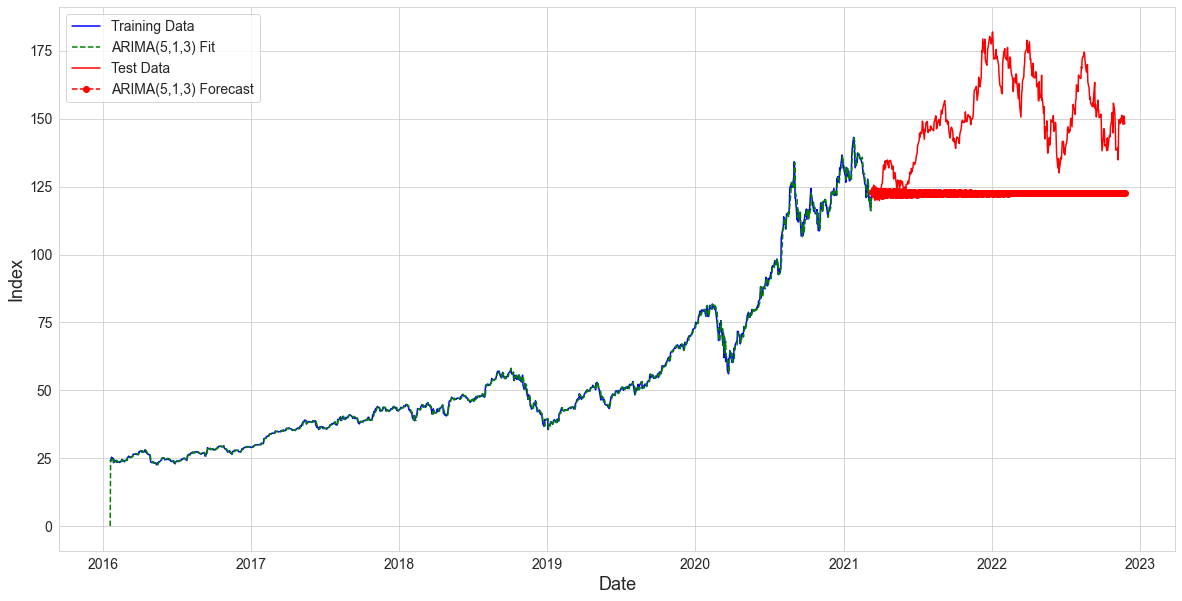

In [35]:
plt.figure(figsize=(20,10))


plt.plot(apple_train2.Date[:], 
         apple_train2.Close[:],
         'b',
         label="Training Data")


## We can get the fitted values with fittedvalues
plt.plot(apple_train2.Date[:],
         model_arima2.fittedvalues[:],
         'g--',
         label="ARIMA(5,1,3) Fit")

plt.plot(apple_test2.Date[:], 
         apple_test2.Close[:],
         'r',
         label="Test Data")

## We can get the forecast with .forecast(h)
plt.plot(apple_test2.Date[:], 
         model_arima2.forecast(len(apple_test2)),
         'r--o',
         label="ARIMA(5,1,3) Forecast")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Index", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()

In [57]:
mse_arima2 = mean_squared_error(apple_test2[['Close']].values, 
                                model_arima2.forecast(len(apple_test2)))
mse_arima2

995.3559630964182